## Lagrange Vs Newton for Chebyshev Polynomials

In [14]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Lagrange Algorithm

In [15]:
def L_Interpolation(f, points, x):
    n = len(points)
    P = 0.
    for i in range(0, n):
        xi = points[i]
        product = 1.
        for j in range(0, n):
            xj =  points[j]
            if j != i:
                product *= (x - xj) / (xi - xj)
        P += f(xi) * product
    return P

### Newton Algorithm

In [16]:
def Prod(x, X):
    prod = 1.
    for x_i in X:
        prod *= x - x_i
    return prod

In [17]:
def NewtonInterpolation(f, x, X):
    n = len(X)
    if n == 1:
        return f(X[0])
    else:
        xm = X[-1]
        X = X[:-1]
        return NewtonInterpolation(f, x, X) + ((f(xm) - NewtonInterpolation(f, xm, X))/Prod(xm, X)) * Prod(x, X)

### Function to be fitted

In [18]:
def f(x):
    return math.exp(-x)
    

### Chebyshev Interpolation Points

In [19]:
n = 15 # No. of interpolation points.
points = [math.cos((2 * j + 1) * math.pi / (2 * n)) for j in range(0, n)]
N = 100  
x = [i / 100 for i in range(-100, 101)]
real_function = [f(xi) for xi in x]
polynomial_approximation = []

for k in x:
    polynomial_approximation.append(L_Interpolation(f, points, k))

error_function_L = [real_function[i] - polynomial_approximation[i] for i in range(len(real_function))]
interpolation_values = [f(xi) for xi in points]

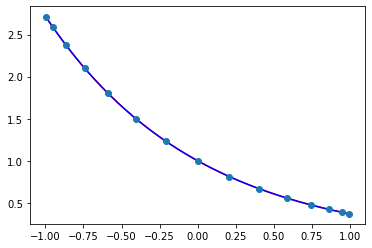

In [20]:
plt.plot(x, real_function, 'r')
plt.plot(x, polynomial_approximation, 'b')
plt.plot(points, interpolation_values, 'o')

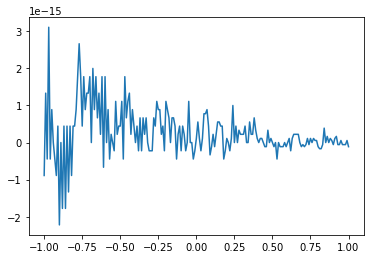

In [21]:
plt.plot(x, error_function_L)

In [22]:

polynomial_approximation_newton = []

for k in x:
    polynomial_approximation_newton.append(NewtonInterpolation(f, k, points))

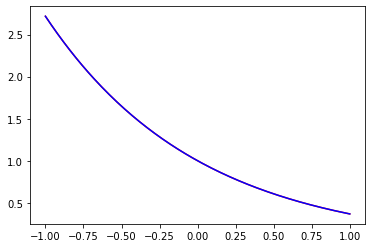

In [24]:
plt.plot(x, real_function, 'r')
plt.plot(x, polynomial_approximation_newton, 'b')

In [25]:
error_function_N = [real_function[i] - polynomial_approximation_newton[i] for i in range(len(real_function))]

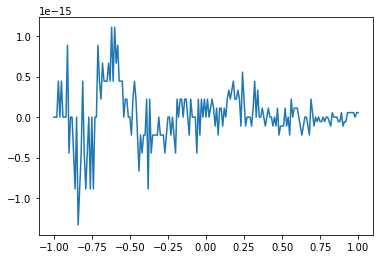

In [26]:
plt.plot(x, error_function_N)